In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report


def data_definition():
    banknote_authentication = fetch_ucirepo(id=267)
    return banknote_authentication.data.features, banknote_authentication.data.targets

def splitter(X, y):
    np.random.seed(42)
    selection = np.random.permutation(len(X))
    test_size = int(len(X) * 0.2)
    val_size = int(len(X) * 0.16)
    test_idx = selection[:test_size]
    val_idx = selection[test_size: test_size + val_size]
    train_idx = selection[test_size + val_size:]

    return (X.iloc[train_idx], y.iloc[train_idx],
            X.iloc[val_idx], y.iloc[val_idx],
            X.iloc[test_idx], y.iloc[test_idx])

In [2]:
def run_experiment(param_name, param_values, fixed_params, X_train, y_train, X_val, y_val):
    train_scores = []
    val_scores = []

    for val in param_values:
        current_params = fixed_params.copy()
        current_params[param_name] = val

        clf = MLPClassifier(**current_params)
        clf.fit(X_train, y_train.values.ravel())

        train_scores.append(accuracy_score(y_train, clf.predict(X_train)))
        val_scores.append(accuracy_score(y_val, clf.predict(X_val)))

    # График
    plt.figure(figsize=(8, 5))
    plt.plot(param_values, train_scores, label='Train Accuracy', marker='o')
    plt.plot(param_values, val_scores, label='Validation Accuracy', marker='s')

    if param_name == 'learning_rate_init':
        plt.title(f'Зависимость точности от коэффициента обучения')
    elif param_name == 'alpha':
        plt.title(f'Зависимость точности от параметра регуляризации')
    elif param_name == 'solver':
        plt.title(f'Зависимость точности от функции оптимизации')

    plt.xlabel(param_name)
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    if isinstance(param_values[0], (int, float)) and param_name in ['alpha', 'learning_rate_init']:
        plt.xscale('log')

    plt.show()

Accuracy (Perceptron): 0.9818
Accuracy (MLP): 1.0000

Отчет классификации MLP:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       147
           1       1.00      1.00      1.00       127

    accuracy                           1.00       274
   macro avg       1.00      1.00      1.00       274
weighted avg       1.00      1.00      1.00       274



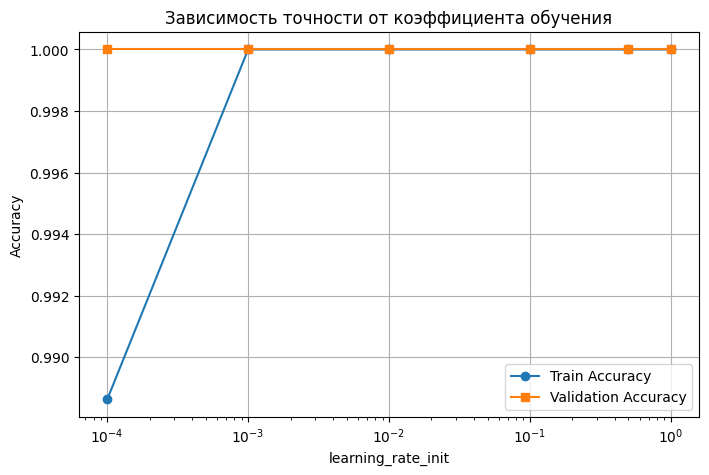

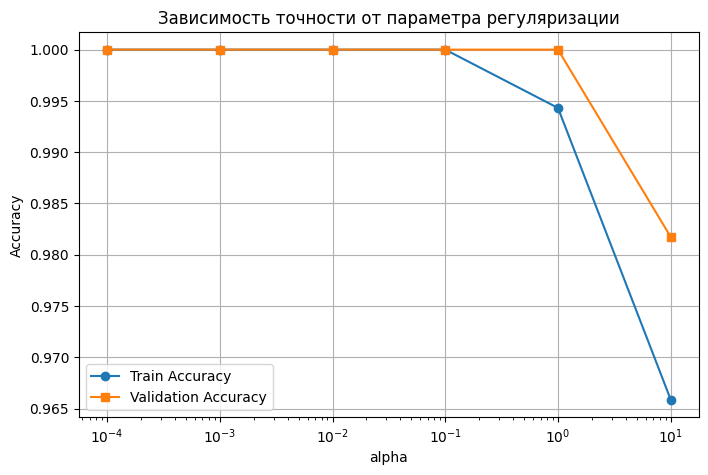

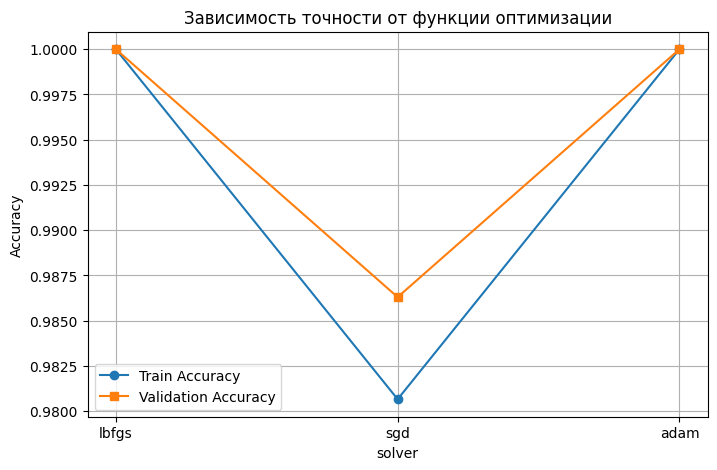

In [ ]:
def main():
    # 1. Загрузка и подготовка данных
    x, y = data_definition()

    x_train, y_train, x_val, y_val, x_test, y_test = splitter(x, y)

    # 2. Масштабирование
    scaler = StandardScaler()
    scaler.fit(x_train)

    x_train_scaled = scaler.transform(x_train)
    x_val_scaled = scaler.transform(x_val)
    x_test_scaled = scaler.transform(x_test)

    # 3. Perceptron
    ppn = Perceptron(max_iter=1000, eta0=0.1, random_state=42)
    ppn.fit(x_train_scaled, y_train.values.ravel())

    y_pred_ppn = ppn.predict(x_test_scaled)
    print(f"Accuracy (Perceptron): {accuracy_score(y_test, y_pred_ppn):.4f}")

    # 4. MLPClassifier
    mlp = MLPClassifier(random_state=42, max_iter=1000)
    mlp.fit(x_train_scaled, y_train.values.ravel())

    y_pred_mlp = mlp.predict(x_test_scaled)
    print(f"Accuracy (MLP): {accuracy_score(y_test, y_pred_mlp):.4f}")
    print("\nОтчет классификации MLP:")
    print(classification_report(y_test, y_pred_mlp))

    # 5. Эксперименты
    base_params = {
        'random_state': 42,
        'max_iter': 1000
    }

    lr_values = [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0]
    run_experiment('learning_rate_init', lr_values, base_params, x_train_scaled, y_train, x_val_scaled, y_val)

    alpha_values = [0.0001, 0.001, 0.01, 0.1, 1, 10]
    run_experiment('alpha', alpha_values, base_params, x_train_scaled, y_train, x_val_scaled, y_val)

    solvers = ['lbfgs', 'sgd', 'adam']
    run_experiment('solver', solvers, base_params, x_train_scaled, y_train, x_val_scaled, y_val)


if __name__ == '__main__':
    main()